In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
dataset = pd.read_csv("iris.csv")


In [90]:
dataset.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


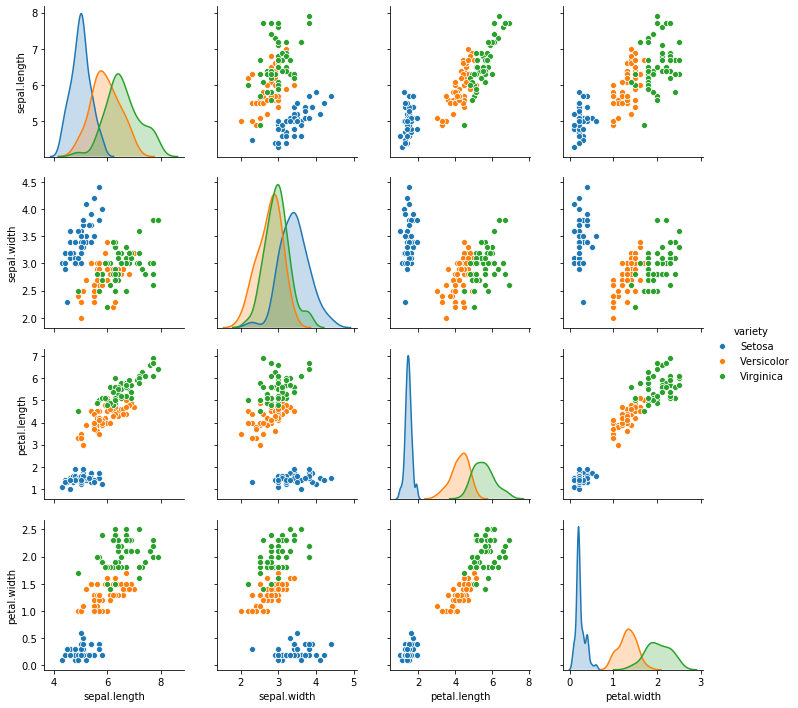

In [92]:
sns.pairplot(dataset, hue = "variety")

Text(0, 0.5, 'Petalo length')

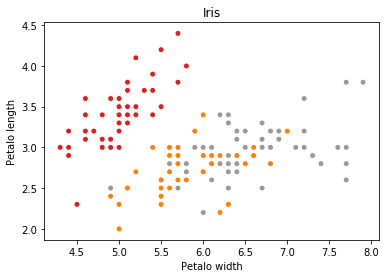

In [151]:

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='w')
plt.title('Iris')
plt.xlabel('Sepalo width')
plt.ylabel('Sepalo length')

Text(0, 0.5, 'Petalo length')

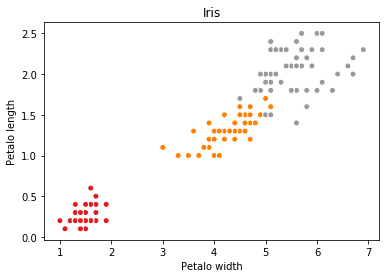

In [153]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='w')
plt.title('Iris')
plt.xlabel('Petalo width')
plt.ylabel('Petalo length')

In [144]:
species_dict = {'setosa':0,'versicolor':1,'virginica':2}

In [145]:
df1 = df.replace({"species":species_dict})
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [160]:
scaler.fit(df.drop('species',axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [161]:
scaled_features = scaler.transform(df.drop('species',axis=1))
 
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [162]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['species'], test_size=0.3)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [164]:
pred = knn.predict(X_test)
pred

array(['setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, pred))
print('\nClassification report:')
print(classification_report(y_test, pred))

acc = np.sum(pred == y_test) /  len(y_test)
print("acurracy:")
acc * 100

Confusion matrix:
[[12  0  0]
 [ 0 18  1]
 [ 0  2 12]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.90      0.95      0.92        19
   virginica       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45

acurracy:


93.33333333333333